In [18]:
from rel import *
from augment import *
from boundaries import *

from scipy.spatial import ConvexHull

import plotly.graph_objects as go



In [19]:
r = REL(square_tri_graph())
r.augment()

ic| cut_vertices: 

[5, 1]


In [20]:
node_degrees = list(r.G.degree(list(r.G.nodes)))

ic| 'planar'


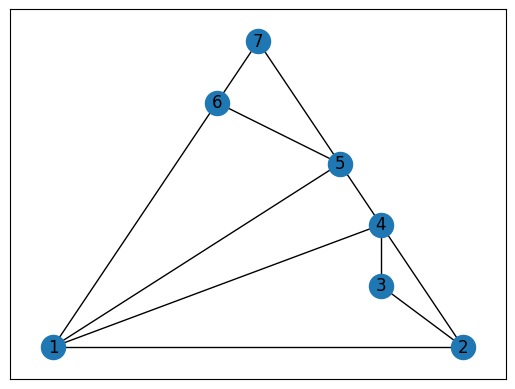

In [21]:
plot_just_planar(r.G)

In [22]:
b = Boundaries(r.G)
b_nodes = b.find_boundary_points()
b_nodes

[1, 2, 7, 6, 4, 5]

In [23]:
b.find_boundary_edges()
b.shortcuts

[(5, 6), (1, 4), (1, 5)]

### temp

In [24]:
G_boundary = nx.subgraph(r.G, b.boundary_nodes)

In [25]:
# find paths between shortcuts .. 

ic| 'planar'


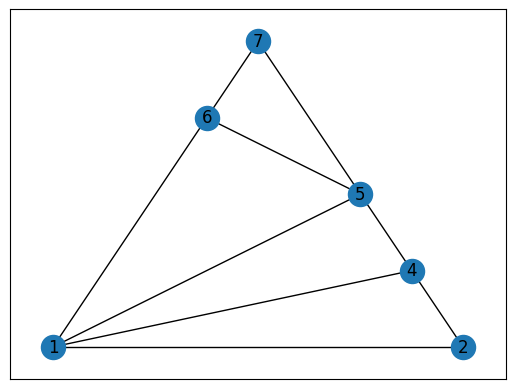

In [26]:
plot_just_planar(G_boundary)

In [27]:
for path in nx.all_simple_paths(r.G, b.shortcuts[0][0], b.shortcuts[0][1]):
    print(path)

[5, 1, 6]
[5, 4, 1, 6]
[5, 4, 3, 2, 1, 6]
[5, 4, 2, 1, 6]
[5, 6]
[5, 7, 6]


### non-fx way to find boundary using convex hull => + how to graph

In [28]:
embed = nx.planar_layout(r.G)
embed

{1: array([-1.        , -0.35714286]),
 2: array([ 0.66666667, -0.35714286]),
 3: array([ 0.33333333, -0.19047619]),
 4: array([ 0.33333333, -0.02380952]),
 5: array([0.16666667, 0.14285714]),
 6: array([-0.33333333,  0.30952381]),
 7: array([-0.16666667,  0.47619048])}

In [29]:
embed_arr = np.array([embed[key] for key in sorted(embed.keys())])

print(embed_arr)
print("Final shape:", embed_arr.shape)

[[-1.         -0.35714286]
 [ 0.66666667 -0.35714286]
 [ 0.33333333 -0.19047619]
 [ 0.33333333 -0.02380952]
 [ 0.16666667  0.14285714]
 [-0.33333333  0.30952381]
 [-0.16666667  0.47619048]]
Final shape: (7, 2)


In [30]:
hull = ConvexHull(embed_arr)
hull.simplices

array([[1, 0],
       [6, 0],
       [6, 1]], dtype=int32)

In [31]:
fig = go.Figure()
# plt.plot(embed_arr[:,0],embed_arr[:,1], 'o')


for simplex in hull.simplices:
    fig.add_trace(go.Scatter(x=embed_arr[simplex, 0], y=embed_arr[simplex, 1], mode='lines+markers',))
    # plt.plot(embed_arr[simplex, 0],embed_arr[simplex, 1], 'k-')

fig.add_trace(go.Scatter(x=embed_arr[:,0], y=embed_arr[:,1], mode='markers', marker_symbol="x")) 

fig.show()